In [1]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer el archivo master.csv
df = pd.read_csv('datosLimpios.csv')
df.head()

C:\Users\caste\AppData\Local\Temp\ipykernel_1144\1236902085.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Probabilidad de suicidio

Se usará la columna de suicides/100k pop que muestra la cantidad de suicidios por cada 100k habitantes.

In [32]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

Hay que convertir los valores numericos a categoricos, es decir colocar umbrales para poder obtener que probabilidad de suicidio tiene el pais o el input.

In [34]:
bins = np.linspace(0, 224.97, 21)
labels = ["5%", "10%", "15%", "20%", "25%", "30%", "35%", "40%", "45%", "50%", "55%", "60%", "65%", "70%", "75%", "80%", "85%", "90%", "95%", "100%"]
y['suicides/100k pop'] = pd.cut(df["suicides/100k pop"], bins, labels=labels, include_lowest=True)
y = y['suicides/100k pop']
y.head()

C:\Users\caste\AppData\Local\Temp\ipykernel_1144\1049579970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['suicides/100k pop'] = pd.cut(df["suicides/100k pop"], bins, labels=labels, include_lowest=True)


0    5%
1    5%
2    5%
3    5%
4    5%
Name: suicides/100k pop, dtype: category
Categories (20, object): ['5%' < '10%' < '15%' < '20%' ... '85%' < '90%' < '95%' < '100%']

In [35]:
print(bins)

[  0.      11.2485  22.497   33.7455  44.994   56.2425  67.491   78.7395
  89.988  101.2365 112.485  123.7335 134.982  146.2305 157.479  168.7275
 179.976  191.2245 202.473  213.7215 224.97  ]


In [36]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train)
print(y_train)

       year  suicides_no  population  gdp_for_year  gdp_per_capita  age_15-24  \
668    1991           77     2310000  1.897200e+11          6404.0      False   
18772  2005           40      575210  8.734654e+09          1704.0      False   
8703   2009            8      105083  2.870625e+09          3765.0      False   
16909  2013           16     1815829  1.274443e+12         11478.0      False   
20924  2015           11     1088177  1.779111e+11          9431.0      False   
...     ...          ...         ...           ...             ...        ...   
21575  2010            0       13885  1.381968e+09          8557.0      False   
5390   1995           32     1219884  7.344706e+10          5695.0       True   
860    2007          155     4601874  2.875305e+11          7918.0      False   
15795  2010            0       30688  2.588176e+09          7806.0      False   
23654  1995          273     4106700  6.129397e+11         16444.0      False   

       age_25-34  age_35-54

In [38]:
# Entrenar el modelo de naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [40]:
# Hacer predicciones
y_pred = model.predict(X_test)
print(y_pred)

['5%' '5%' '5%' ... '5%' '5%' '5%']


In [41]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.6495327102803738


In [42]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    4   31    0    0    0    0    0    0  902    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1   28    0    0    0    0    0    0  393    0    0    0    0
     0    0    0    0]
 [   0    0   10    0    0    0    0    0    0  202    0    0    0    0
     0    0    0    0]
 [   0    1    5    0    0    0    0    0    0   98    0    0    0    0
     0    0    0    0]
 [   0    0    2    0    0    0    0    0    0   56    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   46    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   55    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   22    0    0    0    0
     0    0    0    0]
 [   0   35   55    0    0    0    0    0    0 3586    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   1

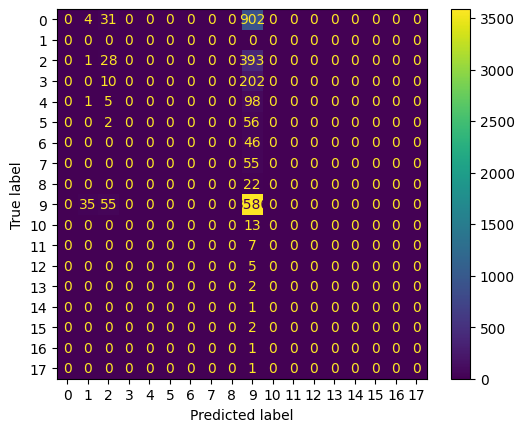

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [44]:
from sklearn.metrics import classification_report
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

         10%       0.00      0.00      0.00       937
        100%       0.00      0.00      0.00         0
         15%       0.21      0.07      0.10       422
         20%       0.00      0.00      0.00       212
         25%       0.00      0.00      0.00       104
         30%       0.00      0.00      0.00        58
         35%       0.00      0.00      0.00        46
         40%       0.00      0.00      0.00        55
         45%       0.00      0.00      0.00        22
          5%       0.67      0.98      0.79      3676
         50%       0.00      0.00      0.00        13
         55%       0.00      0.00      0.00         7
         60%       0.00      0.00      0.00         5
         65%       0.00      0.00      0.00         2
         70%       0.00      0.00      0.00         1
         80%       0.00      0.00      0.00         2
         85%       0.00      0.00      0.00         1


C:\Users\caste\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\caste\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\caste\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(